In [2]:
import sys
sys.path.insert(0, 'C:\\Users\\fl6344\\Desktop\\Baldea\\MHE_learning_dynamics\\DySMHO\\model')
sys.path.insert(0, 'C:\\Users\\fl6344\\Desktop\\Baldea\\MHE_learning_dynamics\\DySMHO\\data')

import model_2D
import utils
import B_data_generation
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

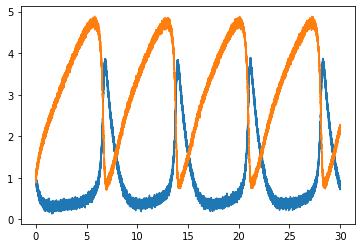



--------------------------- Smoothing data ---------------------------


Prev STD: 0.01895 - New STD: 0.00326 - Percent change: -82.79833
Prev STD: 0.00326 - New STD: 0.00160 - Percent change: -50.84258
Prev STD: 0.00160 - New STD: 0.00109 - Percent change: -31.76856
Prev STD: 0.00109 - New STD: 0.00087 - Percent change: -20.13522
Prev STD: 0.00087 - New STD: 0.00075 - Percent change: -14.52964
Prev STD: 0.00075 - New STD: 0.00067 - Percent change: -9.98897
Smoothing window size (dimension 1): 51 

Prev STD: 0.01695 - New STD: 0.00294 - Percent change: -82.66537
Prev STD: 0.00294 - New STD: 0.00146 - Percent change: -50.23901
Prev STD: 0.00146 - New STD: 0.00102 - Percent change: -30.33865
Prev STD: 0.00102 - New STD: 0.00082 - Percent change: -19.52626
Prev STD: 0.00082 - New STD: 0.00071 - Percent change: -13.23235
Prev STD: 0.00071 - New STD: 0.00064 - Percent change: -9.66744
Smoothing window size (dimension 2): 51 



--------------------------- Pre-processing 1: Dimension 1 ---

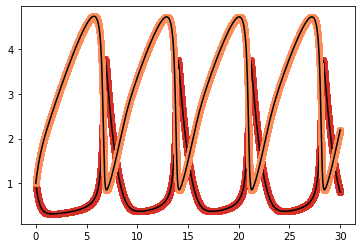

In [8]:
# Brusselator data 
y_init = [1, 1]

horizon_length = 10  # horizon length for optimization problem
time_steps = 20  # number of time steps taken in the MHE

# Basis functions
basis_functions_y0 = [lambda y0,y1: 1, 
                  lambda y0, y1: y0,
                  lambda y0, y1: y1, 
                  lambda y0, y1: y0*y1,
                  lambda y0, y1: y0**2,
                  lambda y0, y1: y1**2,
                  lambda y0, y1: (y0**2)*y1,
                  lambda y0, y1: y0*(y1**2),
                  lambda y0, y1: y0**3,
                  lambda y0, y1: y0**4,
                  lambda y0, y1: np.exp(y0), 
                  lambda y0, y1: 1/y0, 
                  lambda y0, y1: np.sin(y0),
                  lambda y0, y1: np.cos(y0)]
basis_functions_y1 = [lambda y0,y1: 1, 
                  lambda y0, y1: y0,
                  lambda y0, y1: y1, 
                  lambda y0, y1: y0*y1,
                  lambda y0, y1: y0**2,
                  lambda y0, y1: y1**2,
                  lambda y0, y1: (y0**2)*y1,
                  lambda y0, y1: y0*(y1**2),
                  lambda y0, y1: y1**3,
                  lambda y0, y1: y1**4,
                  lambda y0, y1: np.exp(y1), 
                  lambda y0, y1: 1/y1, 
                  lambda y0, y1: np.sin(y1),
                  lambda y0, y1: np.cos(y1)]
# Basis function names
basis_functions_names_y0 = ['1','y0', 'y1', 'y0*y1', 'y0^2', 'y1^2', '(y0^2)*y1', 'y0*(y1^2)', ' y0^3',  'y0^4', 'exp(y0)', '1/y0', 'sin(y0)', 'cos(y0)']
basis_functions_names_y1 = ['1','y0', 'y1', 'y0*y1', 'y0^2', 'y1^2', '(y0^2)*y1', 'y0*(y1^2)', ' y1^3',  'y1^4', 'exp(y1)', '1/y1', 'sin(y1)', 'cos(y1)']
basis_y0 = {'functions': basis_functions_y0, 'names': basis_functions_names_y0} 
basis_y1 = {'functions': basis_functions_y1, 'names': basis_functions_names_y1}

# Data generation (time grid)
xs = np.linspace(0, horizon_length + time_steps, 1000 * (horizon_length + time_steps) + 1)
# Data generation (simulating true dynamics on the time grid with addition of white noise )
t, y = B_data_generation.data_gen(xs, [y_init[0], y_init[1]], [0, 0.05, 0, 0.05], False)
# Data generation (simulating true dynamics on the time grid without addition of white noise)
t_nf, y_nf = B_data_generation.data_gen(xs, [y_init[0], y_init[1]], [0, 0, 0, 0], False)

plt.plot(t,y)
plt.show()


reload(utils)
reload(model_2D)

# Creating MHL class
B_example = model_2D.DySMHO(y,t, [basis_y0, basis_y1])
B_example.smooth()
B_example.pre_processing_1()
B_example.pre_processing_2(significance = 0.8)
B_example.discover(horizon_length, 
                    time_steps, 
                    data_step = 100, 
                    optim_options = {'nfe': 60, 'ncp':15}, 
                    thresholding_frequency = 10, 
                    thresholding_tolerance = 1, 
                    sign = True)
B_example.validate(xs, y_nf, plot = True)
plt.show() 